Day 1: Data + Modeling Foundations
Goal: Set up, prepare data, train 2-3 baseline models

1.   Setup environment (Colab, local or GPU server)
2.   Setup training pipeline (TensorFlow, or Keras)
3.   Dataset preparation and cleaning
4.   Resize and normalize images
5.   Split data (train/val/test)
6.   Train transfer model: MobileNetV2
7.   Train transfer model: ResNet18
8.   Log training time, accuracy, F1, confusion matrix
9.   Save models and results
10.  Evaluate model performance (val/test split)
11.  Compare metrics
12.  Document observations
13.  Start Flask skeleton



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Day 2: Final Models + Deployment
Goal: Select best model, tune it and deploy via Flask

1.   Hyperparameter tuning (e.g., LR, batch size on top 1-2 models
Optional: Train 1 more model (e.g., EfficientNet-lite or custom CNN)
2.   Final evaluation: accuracy, F1, inference speed
3.   Finalize best performing model
4.   Optimize model (e.g., .h5, .pt, .onnx or .tflite)
5.   Set up Flask app with  Upload or input endpoint
 Model inference logic
 Output prediction/label
 Test locally or on lightweight hosting (e.g., Render, Railway, Heroku)
:alarm_clock: Evening (2–3 hours)
 Final QA of Flask app
 Collect logs, test runs
 Prepare screenshots or screen recordings for presentation
 Summarize all performance results in a shared doc




Day 3: Reporting + Presentation
Goal: Deliver a polished presentation/report and live or recorded demo

Morning
 Create slides:
 Problem overview
 Dataset details
 Models tried
 Performance comparison
 Flask deployment demo
 Lessons learned
 Create charts: confusion matrix, bar chart of accuracy, training curves

Afternoon
 Final rehearsal of presentation or recording
 Export/share final model and app (if needed)
 Submit documentation, code, and Flask demo
 Backup everything (Google Drive, GitHub)

Summary Timeline
 Day 1Data prep + baseline modelsClean dataset, 2–3 trained models
 Day 2Final model + Flask appTuned model, working Flask app
 Day 3Reporting + presentationSlides, charts, demo, final report, repo

After downloading Dataset from Kaggle, saved it on Google Drive because
1. you can load datasets stored in Drive
2. you can save your trained models for future use.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Path to Dataset on Google Drive

In [ ]:
animals_path = '/content/drive/MyDrive/animals.zip'


Code correctly extracts your dataset from the zip file into the Colab environment.

animals_path: points to the zip file in Google Drive (e.g., '/content/drive/MyDrive/animals.zip').

extract_path: target folder where the dataset is unpacked.

zip_ref.extractall(): unzips everything into /content/animals_dataset.

In [ ]:
import zipfile
import os

# Destination folder
extract_path = '/content/animals_dataset'

# Unzip the file
with zipfile.ZipFile(animals_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


Show the top level content of the extracted dataset folder.

In [ ]:
import os

# List the first few items in the extracted folder
print(os.listdir(extract_path))


['archive', '__MACOSX']


The dataset was extracted into:
'/content/animals_dataset/raw-img/'

raw-img is the folder where all the class-labeled subfolders (e.g., gatto/, cane/, etc.) live.

In [ ]:
raw_img_path = os.path.join(extract_path, 'archive', 'raw-img')
print(os.listdir(raw_img_path))

['gallina', 'pecora', 'cavallo', 'cane', 'gatto', 'scoiattolo', 'ragno', 'elefante', '.DS_Store', 'farfalla', 'mucca']


 Preview the contents of each class folder in the dataset.

Iterates through each subfolder (i.e. class name like cat, dog, etc.)

Prints the first 5 image filenames inside each class

Helps verify:

Class folder names are correct

Each folder contains image files (like .jpg, .png, etc.)

File format consistency

In [ ]:
for folder in os.listdir(raw_img_path):
    folder_path = os.path.join(raw_img_path, folder)
    if os.path.isdir(folder_path): # Check if it's a directory
        print(f"{folder}: {os.listdir(folder_path)[:5]}")  # show first 5 files

gallina: ['OIP-TsUXuSytozpuL-f62FawWwHaG7.jpeg', 'OIP-fKwWFKIuUcgIg81_afrfPQHaFY.jpeg', 'OIP-ZcEMYnF3VmKAFUBmzX9oQAHaF7.jpeg', 'OIP-J4LFZxXR0RRKQbwVtvxPgQHaFj.jpeg', '861.jpeg']
pecora: ['OIP-iOiJn7GzCS2Cw1tZzHrpawHaDf.jpeg', 'ea34b50e2cf0083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg', 'ea36b50e2ef5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg', 'eb31b10c2df1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg', 'ea37b50728f2013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg']
cavallo: ['OIP-1V9qGxBzZG_PTBFVwHAb8AHaGe.jpeg', 'OIP-kINDYWAuhRMthgI-qZZbDAHaEo.jpeg', 'OIP-dFdCdAQP9_e5MOmku07yFwHaGk.jpeg', 'OIP-uHETHeqRrWN5gS-_7sapMAHaFj.jpeg', 'OIP-XmmfOGvHGszF-97NrQSudQHaEH.jpeg']
cane: ['OIP-TmRbxXpIP0uKmiwNiiMtawHaGe.jpeg', 'OIP-ivixOPr-vvIs6LsuHuemrQHaHa.jpeg', 'OIP-LTENxIkXD-3Xg-gvgFJWMgHaE8.jpeg', 'OIP-G79YEv4jGaCf1kHVPVgkPQHaFj.jpeg', 'OIP-06txpJjbByyhAlbGkpSimAHaE8.jpeg']
gatto: ['645.jpeg', 'nick-karvounis-538861-unsplash.jpg', '1784

Setting up dataset for training in TensorFlow/Keras

To load images into TensorFlow tf.data.Dataset objects, which are great for efficient training. Same with validation set.

Now with two ready-to-use datasets:

train_dataset: batches of images and labels for training

val_dataset: batches for validation during training

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
], name="data_augmentation")

In [ ]:
import tensorflow as tf

batch_size = 16
img_height = 160
img_width = 160

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


Visualize samples from training dataset.
Takes 1 batch from the training dataset and visualizes the first 9 images with their class labels.
Converts image tensors to displayable format and shows them with the correct label

Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


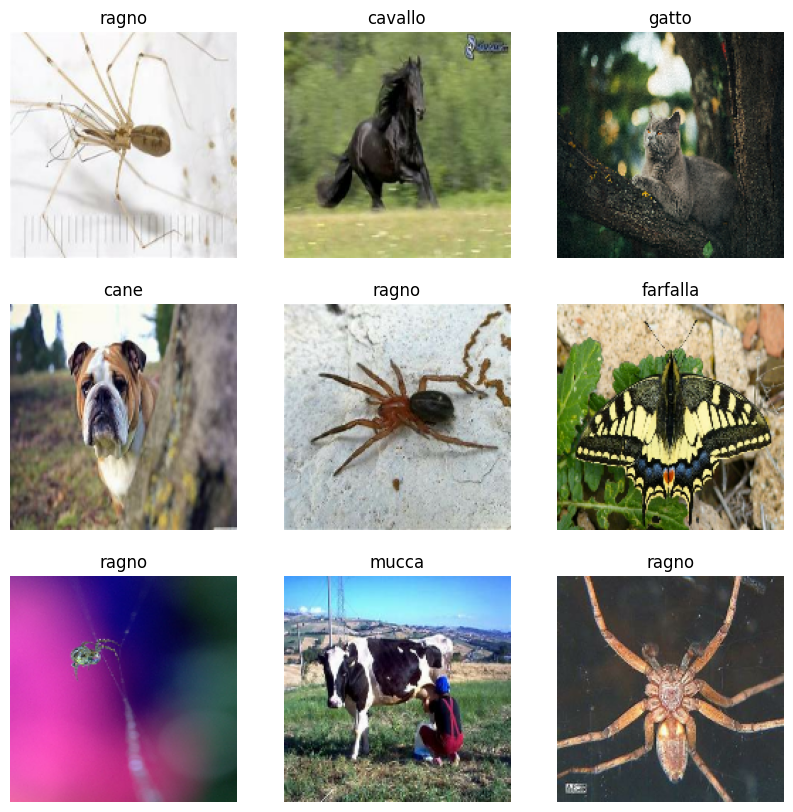

In [ ]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
print("Classes:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


The main library for building and training deep learning models.
Setting up TensorFlow/Keras environment to build and train a CNN model.

import tensorflow is the main library for building and training deep learning models

layers: to add layers like Conv2D, MaxPooling2D, Dense, etc.

models: to build the sequential model architecture

matplotlib to plot training/validation accuracy and loss curves later

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



Loading the dataset with a validation split (20%) and fixed seed for reproducibility.

Reduced image size and batch size to prevent memory issues — smart move.

Printed the class names for verification.

Applied shuffling and prefetching to optimize input pipeline performance.

shuffle(1000) randomizes training data order.

prefetch(buffer_size=AUTOTUNE) overlaps data preprocessing and model execution for speed.

In [ ]:
# Load the dataset first
raw_img_path = os.path.join(extract_path, 'archive', 'raw-img')

img_height = 160
img_width = 160    #Changed the img_height and width from 180 to 160, and batch_size from 31 to 16 due to RAM issue
batch_size = 16

# Load training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Access class names before optimization
class_names = train_ds.class_names
print("Classes:", class_names)

# Optimize performance AFTER accessing class_names
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


CNN model

In [ ]:
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
# ], name="data_augmentation")

cnn_model = tf.keras.Sequential([
    data_augmentation,  # First
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
# ])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Step early stopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model

history = cnn_model.fit(

    train_ds,

    validation_data=val_ds,

    epochs=20,

    #callbacks=[early_stop]
)


Epoch 1/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7571 - loss: 0.7228 - val_accuracy: 0.6527 - val_loss: 1.0821
Epoch 2/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 75s 18ms/step - accuracy: 0.8579 - loss: 0.4312 - val_accuracy: 0.6266 - val_loss: 1.3459
Epoch 3/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9311 - loss: 0.2181 - val_accuracy: 0.6338 - val_loss: 1.7724
Epoch 4/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.9577 - loss: 0.1269 - val_accuracy: 0.6332 - val_loss: 1.9185
Epoch 5/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9747 - loss: 0.0768 - val_accuracy: 0.6342 - val_loss: 2.2542
Epoch 6/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9752 - loss: 0.0717 - val_accuracy: 0.6416 - val_loss: 2.5185
Epoch 7/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9778 - loss: 0.0713 - val_accuracy: 0.6334 - val_loss: 2.4369
Epoch 8/20
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9839 -

Plot CNN with accuracy and loss

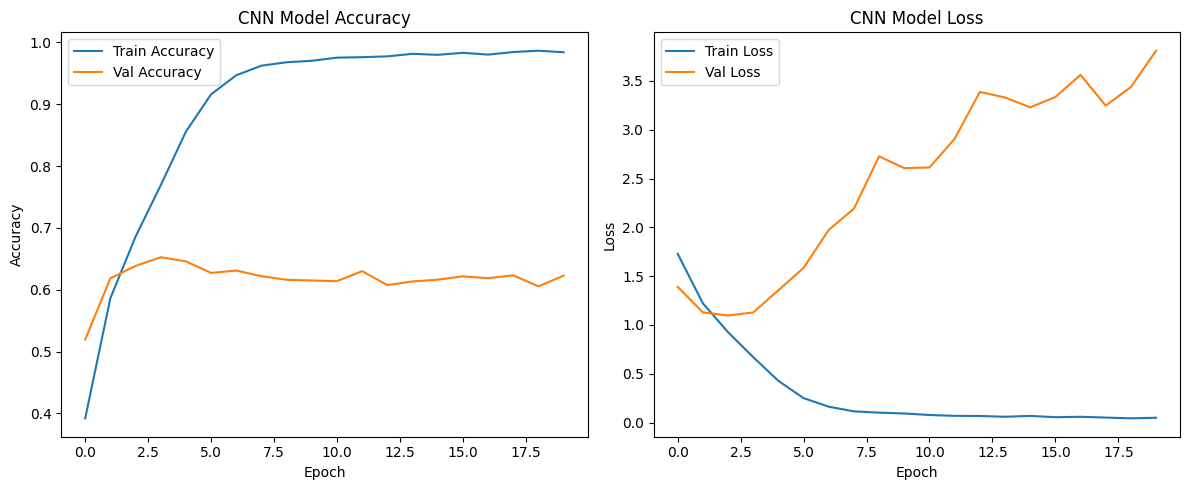

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 10: Generate classification report

# Extract true labels and images
y_true = []
images = []

for img_batch, label_batch in val_ds:
    images.append(img_batch)
    y_true.append(label_batch)

images = np.concatenate(images)
y_true = np.concatenate(y_true)

# Predict with the CNN model
cnn_preds = cnn_model.predict(images)
y_pred_cnn = np.argmax(cnn_preds, axis=1)

# Classification report
print("\nClassification Report for CNN Model:")
print(classification_report(y_true, y_pred_cnn, target_names=class_names))

In [ ]:
#  1. Install Gradio
!pip install gradio --quiet

#  2. Import Required Libraries
import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image

#  3. Load Your Trained Model
# Option A: Use existing in-memory model
model = cnn_model  # or model_resnet, model_mobilenet

# Option B: Load from disk (uncomment if needed)
# from tensorflow.keras.models import load_model
# model = load_model("/content/cnn_model.h5")

#  4. Define Class Names
# Option A: From training dataset
class_names = train_ds.class_names

# Option B: Define manually if dataset is unavailable
# class_names = ['cat', 'dog', 'elephant', 'horse', 'lion', 'tiger']

#  5. Define Preprocessing and Prediction Function
def classify_image(img):
    img = img.resize((160, 160))  # Match training image size
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    confidence_scores = predictions[0]
    predicted_index = np.argmax(confidence_scores)
    predicted_label = class_names[predicted_index]
    confidence = confidence_scores[predicted_index]

    # Return top class probabilities (Gradio will show top 3)
    return {class_names[i]: float(confidence_scores[i]) for i in range(len(class_names))}

#  6. Build the Gradio Interface
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title=" Animal Image Classifier",
    description="Upload an image of an animal to get predictions from your trained CNN, ResNet, or MobileNet model."
)

#  7. Launch the App
interface.launch(share=True)  # share=True gives you a public link
